# QUIZ 1

In [203]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
from scipy.interpolate import CubicSpline
from scipy import optimize

# 1. Elaborar una gráfica de la densidad como función de la altura.

In [204]:
"""
  Densidad en función de la altura
"""

# Definición de los parámetos
p0 = 1 #atm
M = 0.0288 #kg/mol
g = 9.0 #N/m
k = 1.3805e-23 #J/K 
T = 254 #K
NA = 6.0225e23 #es el número de Avogadro
rho0 = 1.29 #kg/m^3
l = 7482.2 #m

Considerando la variación de la presión como:
$$ P = 1.29 \cdot e^\frac{-y}{λ} $$

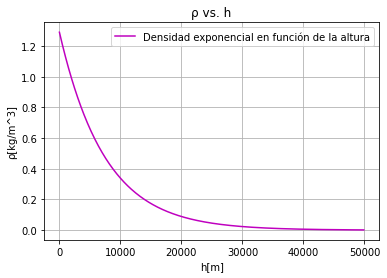

In [128]:
# Definición de la función para la presión
y = np.arange(0, 5e4, 100)
P = lambda y: rho0*np.e**(-y/l)

# Gráfico
plt.figure()
plt.plot(y, P(y), color="m", label="Densidad exponencial en función de la altura")
plt.title("ρ vs. h")
plt.legend()
plt.xlabel("h[m]")
plt.ylabel("ρ[kg/m^3]")
#plt.xlim(0, 3e4)
plt.grid()

# 2. Diseñar un programa que resuelva la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros:

$m=60kg$, $A=0.3m^2$, $h=30km$. (1)

$m=60kg$, $A=0.3m^2$, $h=40km$. (2)

$m=60kg$, $A=0.3m^2$, $h=50km$. (3)

$m=60kg$, $A=0.3m^2$, $h=60km$. (4)

$m=60kg$, $A=0.3m^2$, $h=70km$. (5)

Considerando

$$k_0=\frac{\rho_0A\delta}{2m}
$$

y 

$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + k_0v^2 exp(-y/\lambda)
$$

la ecuación a solucionaría queda expresada como

$$ \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{\rho_0A\delta}{2m}\rho v^2 exp(-y/\lambda)
$$

In [196]:
 """
  Solución de la ecuación diferencial
"""

# Parámetros adicionales
m = 60 #kg
A = 0.3 #m^2 
delta = 0.6 
k0 = rho0*A*delta/(2*m)

# Definición de la función
def eq_diferencial(x, t, params):
  m =  params[0]
  g =  params[1]
  k0 = params[2]
  l =  params[3]    
  dxdt = x[1]
  dvdt =  -g +k0*(x[1]**2)*np.exp(-x[0]/l) 
  return [dxdt, dvdt]

params = [m, g, k0, l]
t = np.linspace(0, 500, 1000) 

In [197]:
# Condiciones iniciales
# Velocidad inicial
v0 = 0 #m/s^2
# Diferentes valores de h
x01 = np.array([3e4, v0]) 
x02 = np.array([4e4, v0]) 
x03 = np.array([5e4, v0])
x04 = np.array([6e4, v0]) 
x05 = np.array([7e4, v0]) 

# Solución de la ecuación
y1 = odeint(eq_diferencial, x01, t, args=(params, ) )  
y2 = odeint(eq_diferencial, x02, t, args=(params, ) )  
y3 = odeint(eq_diferencial, x03, t, args=(params, ) )  
y4 = odeint(eq_diferencial, x04, t, args=(params, ) )  
y5 = odeint(eq_diferencial, x05, t, args=(params, ) ) 

# Para cada parámetro h
# h = 30 km
x1 = y1[:,0] 
v1 = y1[:,1] 
# h = 40 km
x2 = y2[:,0] 
v2 = y2[:,1] 
# h = 50 km
x3 = y3[:,0]
v3 = y3[:,1]
# h = 60 km
x4 = y4[:,0]
v4 = y4[:,1] 
# h = 70 km
x5 = y5[:,0] 
v5 = y5[:,1] 

# 3. Con la solución de la ecuacion diferencial, elaborar una gráfica de:

La posición como función del tiempo.

La velocidad como función del tiempo.

La velocidad como función de la posición.


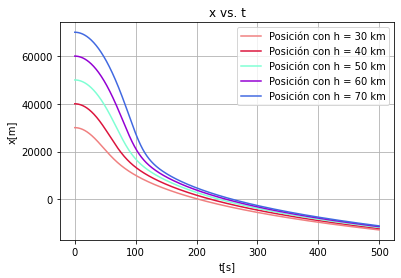

In [198]:
"""
  Gráfica de posición con respecto al tiempo
"""

plt.figure()
plt.plot(t, x1, color="lightcoral", label="Posición con h = 30 km")
plt.plot(t, x2, color="crimson", label="Posición con h = 40 km")
plt.plot(t, x3, color= "aquamarine", label="Posición con h = 50 km")
plt.plot(t, x4, color= "darkviolet", label="Posición con h = 60 km")
plt.plot(t, x5, color="royalblue", label="Posición con h = 70 km")
plt.title("x vs. t")
plt.xlabel("t[s]")
plt.ylabel("x[m]")
plt.legend()
plt.grid()

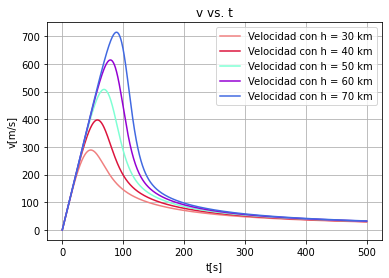

In [199]:
"""
  Gráfica de la velocidad con respecto al tiempo
"""

plt.figure()
plt.plot(t, -v1, color="lightcoral", label="Velocidad con h = 30 km")
plt.plot(t, -v2, color="crimson", label="Velocidad con h = 40 km")
plt.plot(t, -v3, color= "aquamarine", label="Velocidad con h = 50 km")
plt.plot(t, -v4, color= "darkviolet", label="Velocidad con h = 60 km")
plt.plot(t, -v5, color="royalblue", label="Velocidad con h = 70 km")
plt.title("v vs. t")
plt.xlabel("t[s]")
plt.ylabel("v[m/s]")
plt.legend()
plt.grid()

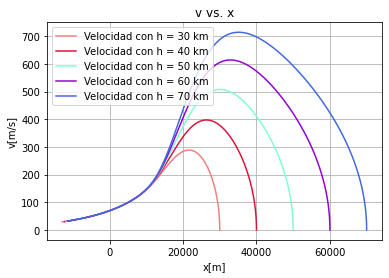

In [200]:
"""
  Gráfica de la velocidad con respecto a la posición
"""

plt.figure()
plt.plot(x1, -v1, color="lightcoral", label="Velocidad con h = 30 km")
plt.plot(x2, -v2, color="crimson", label="Velocidad con h = 40 km")
plt.plot(x3, -v3, color= "aquamarine", label="Velocidad con h = 50 km")
plt.plot(x4, -v4, color= "darkviolet", label="Velocidad con h = 60 km")
plt.plot(x5, -v5, color="royalblue", label="Velocidad con h = 70 km")
plt.title("v vs. x")
plt.xlabel("x[m]")
plt.ylabel("v[m/s]")
plt.legend()
plt.grid()

# 4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:
http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html

In [234]:
"""
 Determinación numérica
"""
# Máximo de las velocidades 
max1=np.max(-v1)
print("Para h=30 km, el máximo es", max1, "m/s")
max2=np.max(-v2)
print("Para h=40 km, el máximo es", max2, "m/s")
max3=np.max(-v3)
print("Para h=50 km, el máximo es", max3, "m/s")
max4=np.max(-v4)
print("Para h=60 km, el máximo es", max4, "m/s")
max5=np.max(-v5)
print("Para h=70 km, el máximo es", max5, "m/s")

Para h=30 km, el máximo es 288.85829414054007 m/s
Para h=40 km, el máximo es 397.560562541534 m/s
Para h=50 km, el máximo es 507.95901529642526 m/s
Para h=60 km, el máximo es 614.3884927728889 m/s
Para h=70 km, el máximo es 714.6541106994897 m/s


La determinación analítica de las velocidades máximas puede hacerse igualando la ecuación de segundo orden (la aceleración) a cero, de forma que pueda despejarse la velocidad. Luego, se construye una función que itere sobre el arreglo de las alturas iniciales.


In [244]:
# Arreglo de posiciones iniciales
ai = [3e4, 4e4, 5e4, 6e4, 7e4]

def max(t, ai, v):
  f = CubicSpline(t, v)              
  min = optimize.fmin_powell(f,0)     
  tmax = abs(min)
  # Interpolación                   
  yx = CubicSpline(t, ai)             
  y_vm = yx(tmax)                     
  return y_vm

# 5. Realice un grafico de la velocidad máxima como función de la altura de caida.



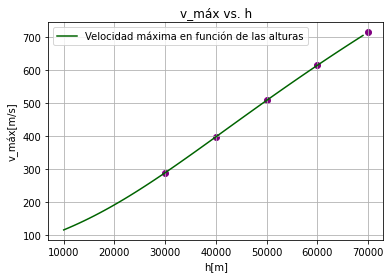

In [236]:
"""
  Gráfica de velocidad máxima con respecto a la altura de caída
"""

a = np.arange(10000, 70000, 1000)
max = []
for i in range(len(a)):
  x = np.array([a[i], v0])
  y = odeint(eq_diferencial, x, t, args=(params, ) ) 
  max.append(np.max(-y[:,1]))

# Gráfica
plt.figure()
plt.plot(a, max, color="darkgreen", label="Velocidad máxima en función de las alturas")
# Arreglos para graficar los puntos
ai = [3e4, 4e4, 5e4, 6e4, 7e4]
vi = [max1, max2, max3, max4, max5]
plt.scatter(ai, vi, color="purple")
plt.title("v_máx vs. h")
plt.xlabel("h[m]")
plt.ylabel("v_máx[m/s]")
plt.legend()
plt.grid()